In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib.animation import FuncAnimation

**Tarea 2**

1.**Estabilidad I** : Usando el código de clase, estudie la estabilidad de los algoritmo Runge-kutta de tercer y cuarto orden. Realice las graficas y suposiciones que considere
necesarias.

**Respuesta:** Para este análisis se usó la ecuación diferencial:
$$\frac{dy}{dx}=x+2y $$

La cual posee la siguiente solución analítica:

$$y(x)=\frac{1}{2}x-\frac{1-e^{2x}}{4} $$

Al graficar los dos métodos numéricos junto a la solución analítica podemos observar que estos son prácticamente idénticos entre sí, lo cual nos da a entender que realizan aproximaciones cercanas. 

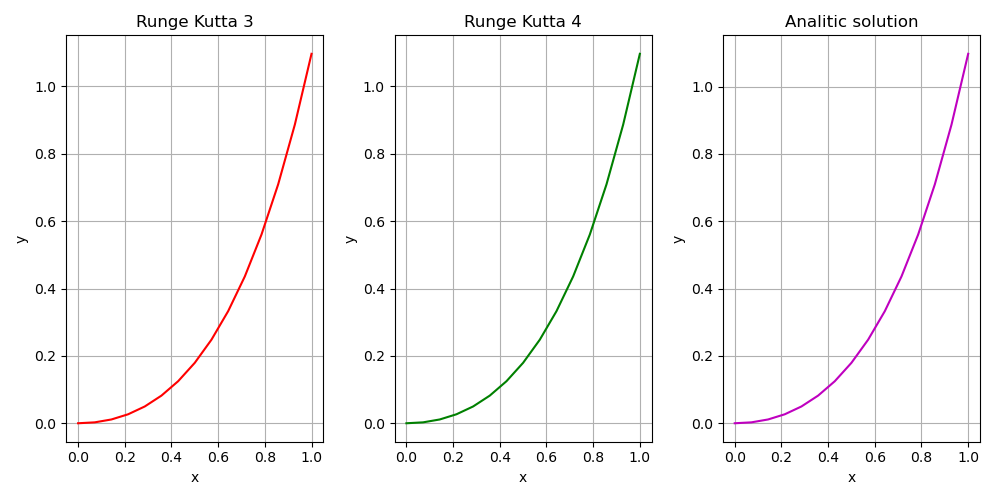

In [2]:
def f(x,y):
    return x + 2*y

def Solution(x):
    return -0.5*x - (1-np.exp(2*x))/4.

N = 15
t = np.linspace(0,1,N)
h = t[1] - t[0]

def RungeKutta3(x,y,h,f):
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2= f(x[i-1]+0.5*h,y[i-1]+0.5*h*k1)
        k3= f(x[i-1]+h,y[i-1]-h*k1+2*h*k2)
        
        y[i] = y[i-1] + (1/6)*h*(k1+4*k2+k3)
        
def RungeKutta4(x,y,h,f):
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2= f(x[i-1]+0.5*h,y[i-1]+0.5*h*k1)
        k3= f(x[i-1]+0.5*h,y[i-1]+0.5*h*k2)
        k4 = f(x[i-1]+h,y[i-1]+k3*h)
        
        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)
        
y3 = np.zeros_like(t)
y3[0] = 0
RungeKutta3(t,y3,h,f)

y4 = np.zeros_like(t)
y4[0] = 0
RungeKutta3(t,y4,h,f)

fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(t,y3,color='r')
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Runge Kutta 3')

ax2.plot(t,y4,color='g')
ax2.grid()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Runge Kutta 4')

ax3.plot(t,Solution(t),color='m')
ax3.grid()
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Analitic solution')

fig.tight_layout()

Sin embargo, si se observa la estabilidad de los diferentes métodos se puede observar con un pequeño paso de integración que el método de Runge Kutta cuatro resulta tener una mayor estabilidad, ya que al graficar la función compleja este método logra cerrar la trayectoria mostrada en el plano complejo. Esto también indicaría una mayor reducción en el error de la solución propuesta por el método numérico.

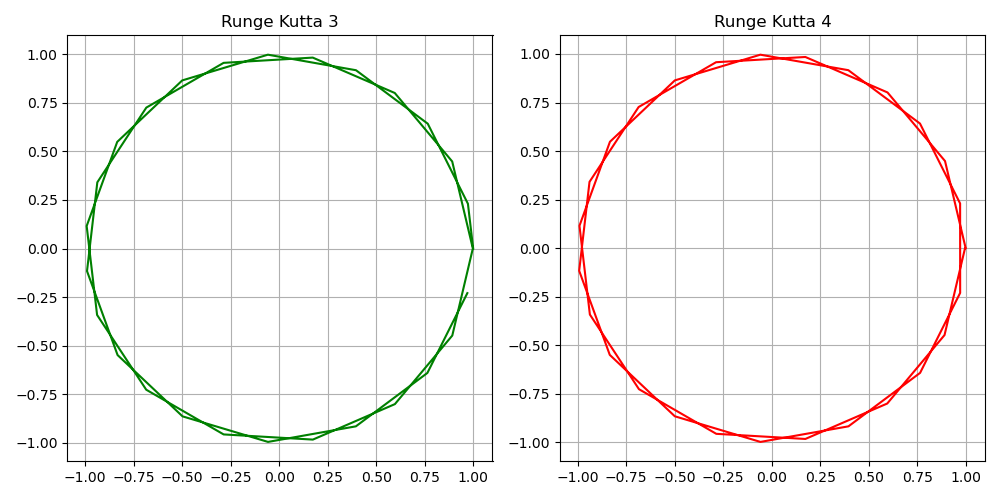

In [3]:
def fc(z):
    return 1j*z #j es el complejo

theta = 0.
Nc = 27
Vueltas = 1
h_ = Vueltas * 2*np.pi/Nc
f=1

Solucion1 = np.array([theta,f])
Solucion2 = np.array([theta,f])

def ComplexRungeKutta3():
    global theta 
    global h_
    global f
    
    theta += h_

    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f-h_*k1+2*h_*k2)
    f += (1/6)*h_*(k1+4*k2+k3)
    
def ComplexRungeKutta4():
    global theta 
    global h_
    global f
    
    theta += h_

    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f+0.5*h_*k2)
    k4= fc(f+h_*k3)
    f += (1/6)*h_*(k1+2*k2+2*k3+k4)
    

for i in range(Nc):
    ComplexRungeKutta3()
    Solucion1 = np.vstack([Solucion1, np.array([theta,f])])
    ComplexRungeKutta4()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f])])
    
Re1 = np.real(Solucion1[:,1])
Im1 = np.imag(Solucion1[:,1])

Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])

fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(Re1,Im1,color='g')
ax1.grid()
ax1.set_title('Runge Kutta 3')

ax2.plot(Re2,Im2,color='r')
ax2.grid()
ax2.set_title('Runge Kutta 4')

fig.tight_layout()

2.**Estabilidad II**: Para el algoritmo de Verlet:

**(a)** Muestre que el error del método está descrito por:
$$ \epsilon_{n+1}-(2+h^2a_n')\epsilon_n+\epsilon_{n-1}=0 \quad a_n'=\frac{\partial a}{\partial x}$$


**Respuesta:** El método de Verlet se basa en la iteración de la suma de las siguientes ecuaciones:

$$ x_{n+1}=x_n-v_n(dt)+\frac{1}{2}a_n(dt)^2$$
$$ x_{n-1}=x_n+v_n(dt)+\frac{1}{2}a_n(dt)^2$$
$$ x_{n-1}+x_{n+1}=2x_n+a_n(dt)^2$$

Reescribiendo el cambio del tiempo como el paso de integración h en el método, además de tener en cuenta que la aceleración se puede escribir como una función dependiente de la posición obtenemos que:

$$ x_{n-1}+x_{n+1}=2x_n+a_n(x_n)h^2$$

Ahora, escribiendo los errores propios de cada punto $x_i$ tenemos que:

$$ x_{n-1} +\epsilon_{n-1}+x_{n+1}+\epsilon_{n+1}=2x_n+2\epsilon_{n}+a_n(x_n+\epsilon_n)h^2$$

Dicho término de error en la aceleración se puede expandir mediante una expansión de Taylor:

$$ x_{n-1} +\epsilon_{n-1}+x_{n+1}+\epsilon_{n+1}=2x_n+2\epsilon_{n}+a_nx_nh^2+\frac
{da_n}{dx}\epsilon_nh^2$$

Así, separando los términos de error de los que poseen la inofrmación de posición exacta tenemos que:

$$ \epsilon_{n-1}+\epsilon_{n+1}=2\epsilon_{n}+\frac{da_n}{dx}\epsilon_nh^2$$

$$ \epsilon_{n+1}-\left(2+\frac{da_n}{dx}h^2\right)\epsilon_{n}+\epsilon_{n-1}$$

**(b)** Para el caso de un oscilador armónico muestre que:
$$\epsilon_{n+1}-2(1-R)\epsilon_n +e_{n-1}=0 $$
donde $2R=h^2\omega^2$.

**Respuesta:** Para un oscilador armónico, la aceleración se puede expresar en términos de la posición gracias a la ecuación que describe su movimiento $\ddot{x} =a= -\omega^2 x$. Así, la derivada de la aceleración con respecto a la posición es $a' = -\omega^2$. Sustituyendo en la ecuación para el error obtenemos:

$$ \epsilon_{n+1} - 2(1 - h^2\omega^2)\epsilon_n + \epsilon_{n-1} = 0 $$

Si definimos $2R = h^2\omega^2$, la ecuación se convierte en:

$$ \epsilon_{n+1} - 2(1 - R)\epsilon_n + \epsilon_{n-1} = 0 $$

**(c)** Usando la suposición de función potencia $\epsilon_n = \epsilon_0\lambda^n$, muestre que las raíces son:
$$\lambda_{\pm}=1-R\pm \sqrt{R^2 -2R} $$

**Respuesta:** Usando la suposición de función potencia dada en el enunciado tenemos que la ecuación de error se convierte en:

$$ \epsilon_0\lambda^{n+1} - 2(1 - R)\epsilon_0\lambda^n + \epsilon_0\lambda^{n-1} = 0 $$

Dividiendo toda la ecuación por $\epsilon_0\lambda^{n-1}$ para simplificarla tenemos:

$$ \lambda^2 - 2(1 - R)\lambda + 1 = 0 $$

Para hallar las raíces de la nueva expresión del polinomio que obtuvimos podemos utilizar la fórmula cuadrática.

$$ \lambda_{\pm} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} \quad \rightarrow \quad \lambda_{\pm} = \frac{2(1-R) \pm \sqrt{4(1-R)^2 - 4}}{2} \quad \rightarrow \quad \lambda_{\pm} = 1 - R \pm \sqrt{(1 - R)^2 - 1} $$

Simplificando el término dentro de la raíz cuadrada obtenemos:

$$ \lambda_{\pm} = 1 - R \pm \sqrt{R^2 - 2R} $$


**(d)** El valor de estabilidad se obtiene para $|\lambda_{\pm}|=1$. Muestre que el paso de integración debe cumplir:
$$h\leq\frac{2}{\omega}$$

**Respuesta:** Dado que el valor de estabilidad se cumple para $|\lambda_\pm|=1$ es necesario que:

$$ |\lambda_{\pm}| = |1 - R \pm \sqrt{R^2 - 2R}| \leq 1 \quad \rightarrow \quad -1\leq 1 - R  \pm \sqrt{R^2 - 2R} \leq 1$$ 
$$-2+R\leq   \sqrt{R^2 - 2R} \leq R $$

Sin embargo, para la raíz de la desigualdad no se pueden permitir números complejos, ya que pierde el sentido físico, por lo que debe ser mayor o igual a cero. Además, como la raíz se indetermina en 2 podemos reescribir la igualdad como:

$$R\leq   \sqrt{R^2 - 2R} \leq R-2 \quad \rightarrow \quad R^2\leq   R^2 - 2R \leq R^2-4R+4$$
$$ 0 \leq - 2R \leq -4R+4 $$
Sustituyendo $R = \frac{h^2\omega^2}{2}$ y considerando sólo la parte derecha de la desigualdad obtenemos:
$$- 2\left(\frac{h^2\omega^2}{2}\right) \leq -4\left(\frac{h^2\omega^2}{2}\right)+4  $$
$$h^2\omega^2 \leq 4 \quad \rightarrow \quad h \leq \frac{2}{\omega}$$

**(e)** Implemente una rutina sencilla del método de Verlet para el oscilador armónico y muestre en una animación el comportamiento en la región estable y en la región inestable. Use $x(0) = 1$, $\dot{x}(0) = 1$ y $\omega = \pi$. Itere el tiempo suficiente para evidenciar el comportamiento de la estabilidad.

In [4]:
x0 = np.array([1., 1.])
omega=np.pi

def Verlet(x0, t, h,omega):
    t = np.arange(0, t, h)
    x_n = np.zeros_like(t)
    x_r = np.zeros_like(t)
    x_n[0] = x0[0]
    
    for i in range(0, len(t)-1):
        if i == 0:
            x_n[i + 1] = x_n[i] + h*(x0[1] + h*(-(omega**2) * x_n[i]))
        else:
            x_n[i + 1] = 2*x_n[i] - x_n[i - 1] + (-(omega**2) * x_n[i])*(h**2)
            
        x_r[i]=np.cos(omega*t[i]) + ((np.sin(omega*t[i]))/omega)
    return x_n,x_r,t

x_stable,x_analitic_sta,t_stable = Verlet(x0, 25, 0.1,omega)
x_nstable,x_nanalitic_sta,t_nstable = Verlet(x0, 25, 0.65,omega)

En la animación se puede apreciar cómo al cambiar la condición de estabilidad para h, la gráfica del método de Verlet tiende a desestibilizarse con el paso del tiempo con respecto a la gráfica de la función analítica. Puesto que también tiende a crecer de manera increíble la amplitud del oscilador armónico.

**Convención de colores:** La gráfica en amarillo muestra la función analítica o real, mientras que la morada muestra el método de Verlet.

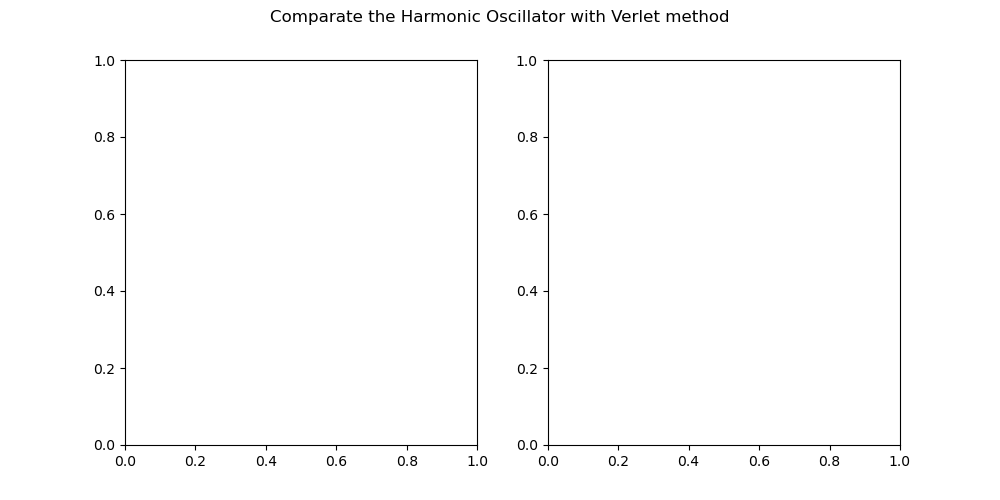

In [5]:
figa = plt.figure(figsize = (10, 5))
figa.suptitle('Comparate the Harmonic Oscillator with Verlet method')
ax1a = figa.add_subplot(121)
ax2a = figa.add_subplot(122)
scale = 1
    
def Updatea(i):
    ax1a.plot(t_stable[::scale][:i], x_stable[::scale][:i], color = 'm')
    ax1a.plot(t_stable[::scale][:i], x_analitic_sta[::scale][:i], color = 'y')
    ax1a.set_title("Stable region $(h \leq 2/\omega)$")
    
    ax2a.plot(t_nstable[::scale][:i], x_nstable[::scale][:i], color = 'm')
    ax2a.plot(t_nstable[::scale][:i], x_nanalitic_sta[::scale][:i], color = 'y')
    ax2a.set_title("Unstable region $(h \geq 2/\omega)$")
        
    if i <= len(t_stable) - 1:
        ax1a.plot(t_stable[::scale], x_stable[::scale], color = 'm') 
        ax1a.plot(t_stable[::scale], x_analitic_sta[::scale], color = 'y')
        ax2a.plot(t_nstable[::scale], x_nstable[::scale], color = 'm')
        ax2a.plot(t_nstable[::scale], x_nanalitic_sta[::scale], color = 'y')
        
Animation = FuncAnimation(figa, Updatea, frames = len(t_stable), repeat = False)

3.Resolver analíticamente de ecuación diferencial de Riccati:
$$x^3y'=x^4y^2-2x^2y-1$$
Una solución particular está dada por: $y_1=x^{-2}$. Encuentre numéricamente la solución usando alguno de los métodos vistos en clase con la condición inicial $y(\sqrt{2})=0$

**Reespuesta:** En primer lugar, reescribimos la ecuación diferencial de la forma $y'=p(x)+yq(x)+y^2g(x)$.
$$y'=xy^2-\frac{2}{x}y-\frac{1}{x^3}$$
Ahora, conociendo una de las soluciones podemos realizar el siguiente cambio de variable:
$$y(x)=y_1(x)+\frac{1}{u(x)}=\frac{1}{x^2}+\frac{1}{u(x)} \quad ;\quad \frac{dy}{dx}=\frac{dy_1}{dx}-\frac{1}{u^2}\frac{du}{dx}= x\left(\frac{1}{x^2}\right)^2-\frac{2}{x}\left(\frac{1}{x^2}\right)-\frac{1}{x^3}=-\frac{2}{x^3}-\frac{1}{u^2}\frac{du}{dx}$$
$$\rightarrow  \frac{dy}{dx}=\frac{dy_1}{dx}-\frac{1}{u^2}\frac{du}{dx}=xy^2-\frac{2}{x}y-\frac{1}{x^3} = -\frac{2}{x^3}-\frac{1}{u^2}\frac{du}{dx} \quad \rightarrow\quad \frac{1}{u^2}\frac{du}{dx}=-xy^2+\frac{2}{x}y-\frac{1}{x^3}$$
El cual sabemos que podemos aplicar gracias a que se conoce una de las soluciones. Reemplazando el cambio de variable en la nueva expresión encontrada hallamos que se redujo el problema a una ecuación diferencial de primer orden, donde C será una constante de integración.
$$\frac{1}{u^2}\frac{du}{dx}=-x\left(\frac{1}{x^2}+\frac{1}{u}\right)^2+\frac{2}{x}\left(\frac{1}{x^2}+\frac{1}{u}\right)-\frac{1}{x^3} =-x\left(\frac{1}{x^4}+\frac{2}{x^2u}+\frac{1}{u^2}\right)+\frac{2}{x}\left(\frac{1}{x^2}+\frac{1}{u}\right)-\frac{1}{x^3}$$
$$=-\frac{1}{x^3}-\frac{1}{x^3}-\frac{2}{ux}-\frac{x}{u^2}+\frac{2}{x^3}+\frac{2}{xu}=-\frac{x}{u^2} \quad \rightarrow\quad \frac{du}{dx}=-x\quad \rightarrow\quad u(x)=-\frac{x^2}{2}+C$$
$$ y(x)=y_1(x)+\frac{1}{u(x)}=\frac{1}{x^2}+ \left(-\frac{x^2}{2}+C\right)^{-1}$$
Aplicando las condiciones iniciales tenemos que:
$$y(\sqrt{2})= \frac{1}{(\sqrt{2})^2}+ \left(-\frac{(\sqrt{2})^2}{2}+C\right)^{-1}=0 \quad \rightarrow\quad \frac{1}{-1+C}=-\frac{1}{2}\quad \rightarrow\quad C =-1$$
Por ende, la solución general de la ecuación será: 
$$y(x)=\frac{1}{x^2}- \left(\frac{x^2}{2}+1\right)^{-1} $$

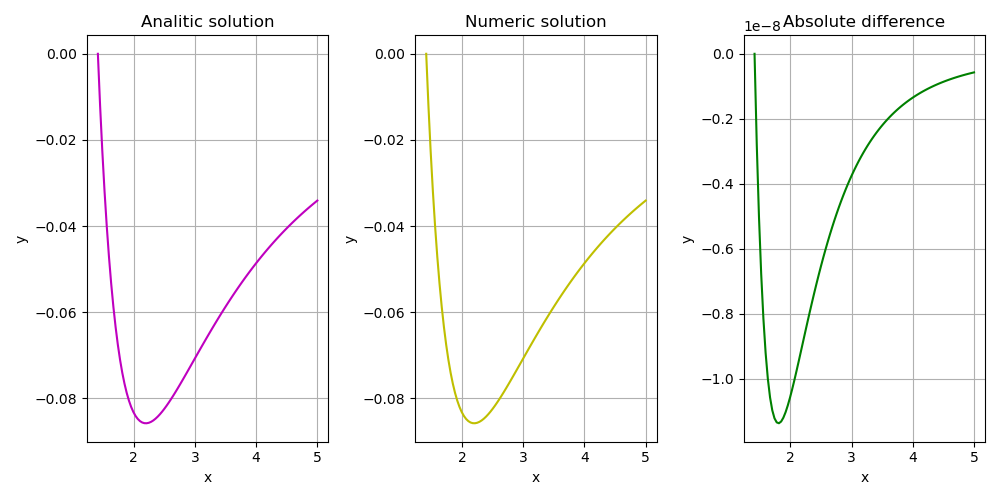

In [6]:
def g(x,y):
    return (x*y**2)-(2/x)*y-(1/(x**3))

def Solucion(x):
    return 1/(x**2) -((x**2)/2+1)**(-1)

#Puntos para la discretizacion
N = 100
t = np.linspace(np.sqrt(2),5,N)
h = t[1] - t[0]
yext = Solucion(t)

def RungeKutta4(x,y,h,f):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+0.5*h,y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1]+0.5*h,y[i-1] + 0.5*h*k2)
        k4 =  f(x[i-1]+h,y[i-1]+k3*h)
        
        y[i] = y[i-1] + (h/6)*(k1+2*k2+2*k3+k4)
        
y4 = np.zeros_like(t)
y4[0] = 0.
RungeKutta4(t,y4,h,g)

fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
 
ax1.plot(t, yext,color='m')
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Analitic solution')

ax2.plot(t, y4,color='y')
ax2.grid()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Numeric solution')

ax3.plot(t,yext-y4,color='g')
ax3.grid()
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Absolute difference')

fig.tight_layout()